## Activity 4: Data Preparation and Cleaning for Credit card fraud detection

In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set plotting style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [70]:
#Load the datasets 'fraudTrain.csv' and 'fraudTest.csv'
train_df = pd.read_csv("fraudTrain.csv")
test_df = pd.read_csv("fraudTest.csv")

In [71]:
#Explore the data entries and shape of the datasets
print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

print("\nTrain data preview:")
print(train_df.head())

print("\nTest data preview:")
print(test_df.head())

Train dataset shape: (1296675, 23)
Test dataset shape: (555719, 23)

Train data preview:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry

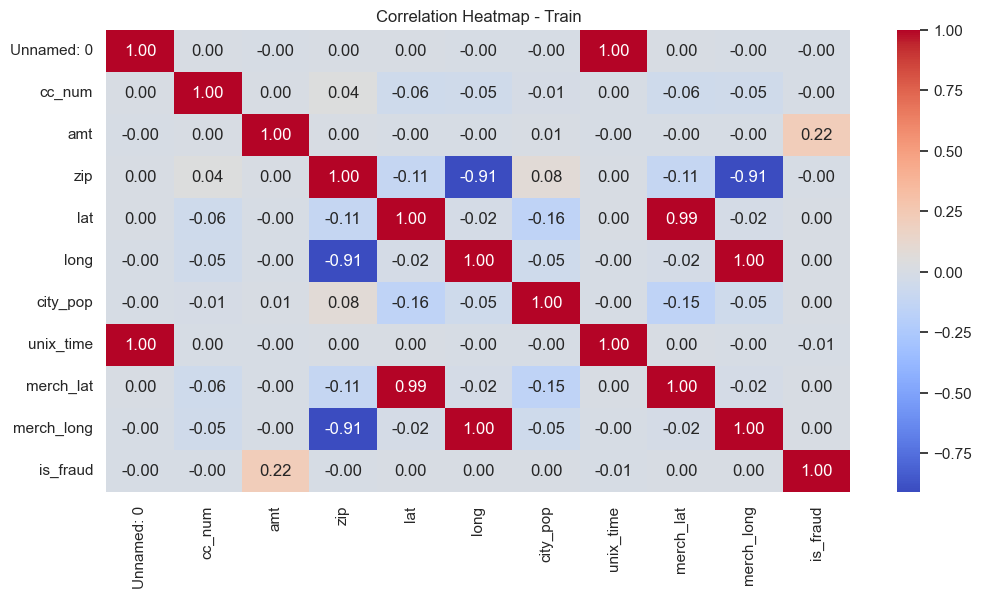

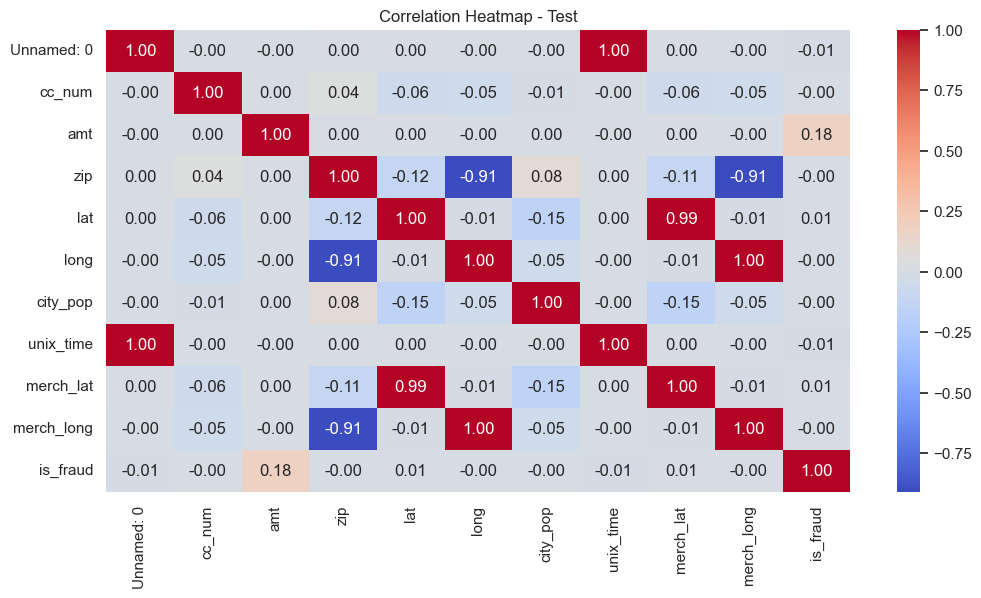

In [72]:
#Check the correlation between numerical features and plot heatmap in both datasets
train_corr = train_df.select_dtypes(include=np.number).corr()
test_corr = test_df.select_dtypes(include=np.number).corr()

# Heatmap for train dataset
plt.title("Correlation Heatmap - Train")
sns.heatmap(train_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

# Heatmap for test dataset
plt.title("Correlation Heatmap - Test")
sns.heatmap(test_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [73]:
#Drop unnecessary columns like 'Unnamed: 0'
train_df.drop(columns=["Unnamed: 0"], inplace=True)
test_df.drop(columns=["Unnamed: 0"], inplace=True)

In [74]:
#Handle missing values and duplicate entries
# Check missing values
print("\nMissing values in train dataset:")
print(train_df.isnull().sum())

print("\nMissing values in test dataset:")
print(test_df.isnull().sum())

# Drop duplicate entries
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)


Missing values in train dataset:
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Missing values in test dataset:
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
la

In [75]:
#Convert dob,trans_date_trans_time column in both test & train to datetime data type and creating new 'trans_date' column
for df in [train_df, test_df]:
    df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
    df['trans_date'] = df['trans_date_trans_time'].dt.date

In [76]:
#Check the Fraud and the Normal transaction numbers for test and train datasets
print("\nTrain dataset fraud vs normal:")
print(train_df['is_fraud'].value_counts())

print("\nTest dataset fraud vs normal:")
print(test_df['is_fraud'].value_counts())


Train dataset fraud vs normal:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Test dataset fraud vs normal:
is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [77]:
#Merge train and test datasets for exploratory data analysis
merged_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
print("\nMerged dataset shape:", merged_df.shape)


Merged dataset shape: (1852394, 23)


## Activity 5: Exploratory Data Analysis (EDA)

C:\Users\romdh\AppData\Local\Temp\ipykernel_5992\1612490551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df[merged_df['category'].isin(top_categories.index)],


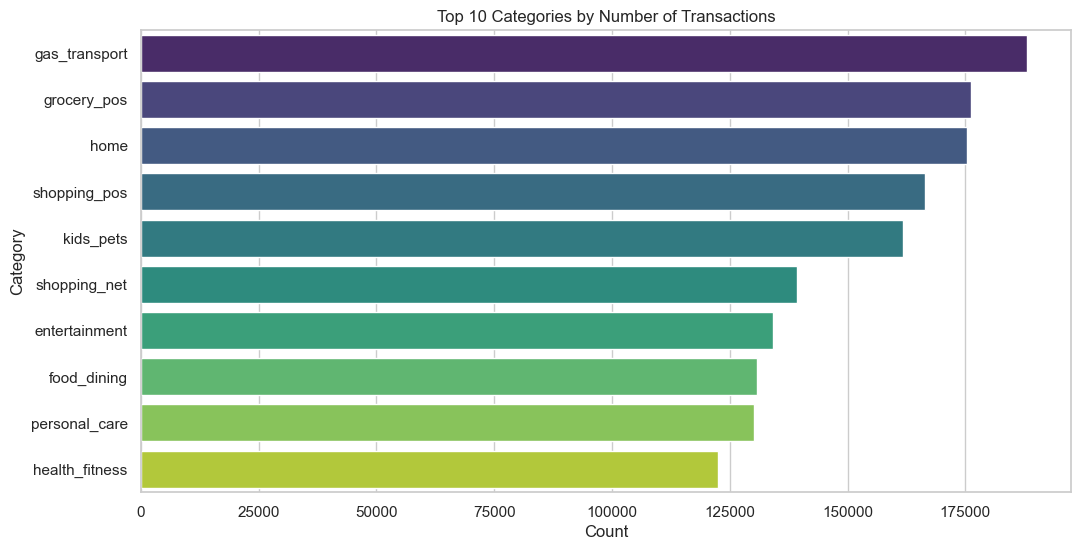

In [78]:
#Count plot of Transactions by top 10 Categories in merged datasets and provide the conclusions and insights gathered
top_categories = merged_df['category'].value_counts().nlargest(10)

sns.countplot(data=merged_df[merged_df['category'].isin(top_categories.index)],
              y='category', order=top_categories.index, palette='viridis')
plt.title("Top 10 Categories by Number of Transactions")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

C:\Users\romdh\AppData\Local\Temp\ipykernel_5992\2576334153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='gender', palette='Set2')


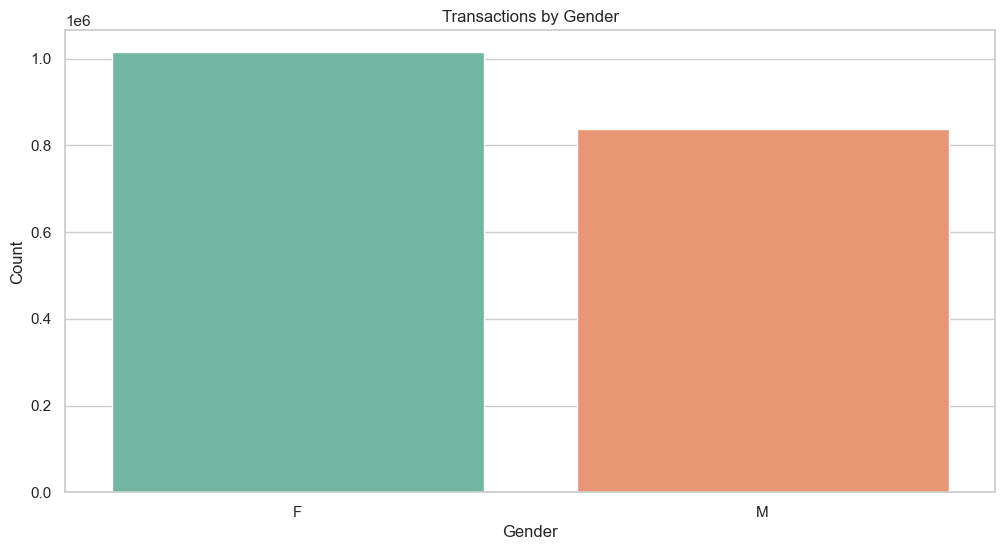

In [79]:
#Count plot of Transactions by Gender in merged datasets and provide the conclusions and insights gathered
sns.countplot(data=merged_df, x='gender', palette='Set2')
plt.title("Transactions by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

C:\Users\romdh\AppData\Local\Temp\ipykernel_5992\3099664626.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df[merged_df['merchant'].isin(top_merchants.index)],


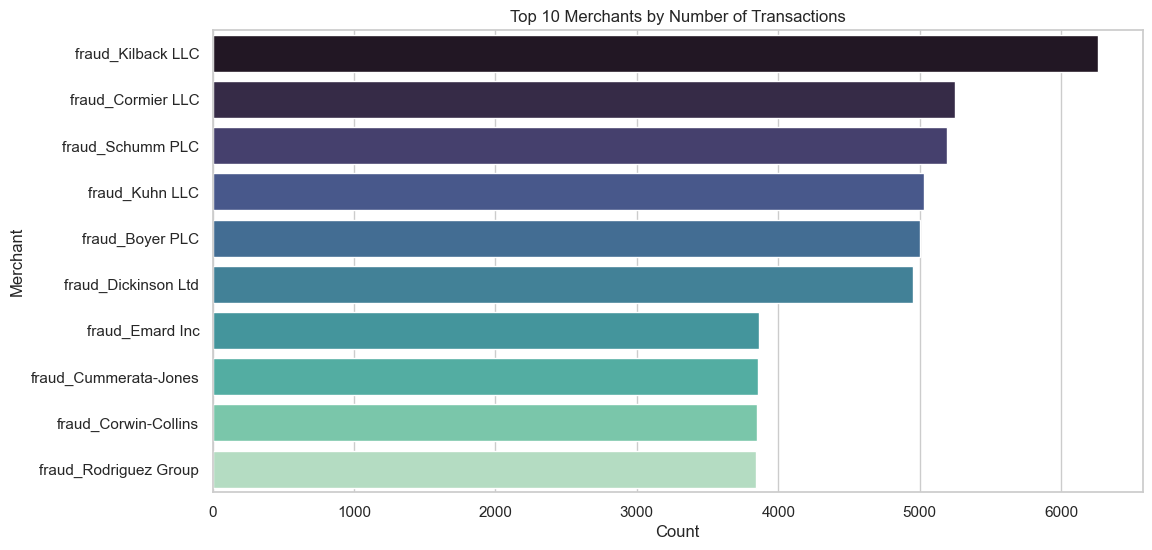

In [80]:
#Count plot of Transactions by top 10 Merchants in merged datasets and provide the conclusions and insights gathered
top_merchants = merged_df['merchant'].value_counts().nlargest(10)

sns.countplot(data=merged_df[merged_df['merchant'].isin(top_merchants.index)],
              y='merchant', order=top_merchants.index, palette='mako')
plt.title("Top 10 Merchants by Number of Transactions")
plt.xlabel("Count")
plt.ylabel("Merchant")
plt.show()

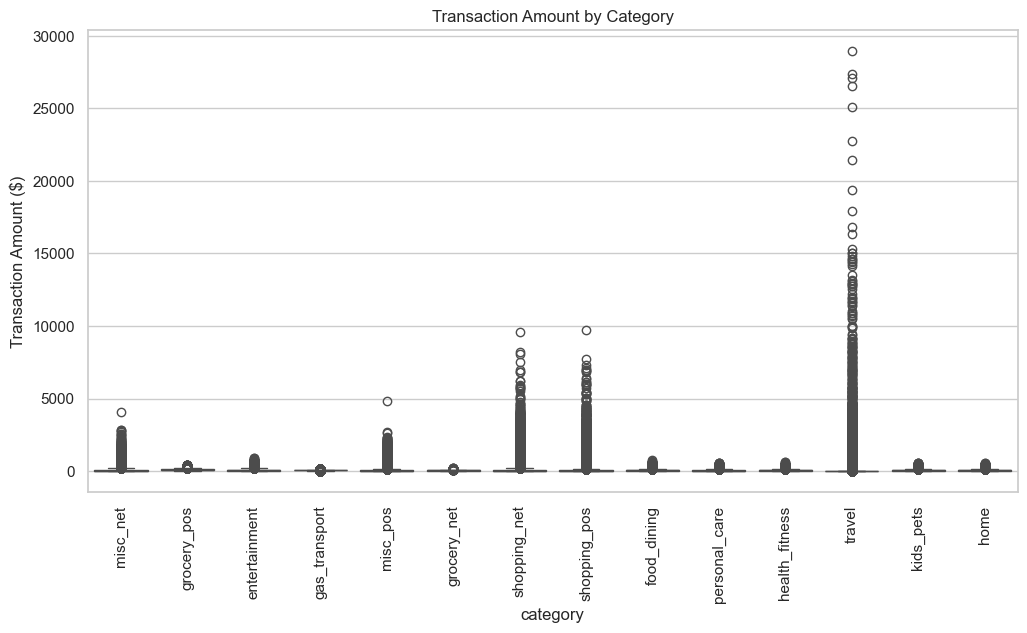

In [81]:
#Box plot of transaction amount by category and provide the conclusions and insights gathered
sns.boxplot(data=merged_df, x='category', y='amt')
plt.xticks(rotation=90)
plt.title("Transaction Amount by Category")
plt.ylabel("Transaction Amount ($)")
plt.show()

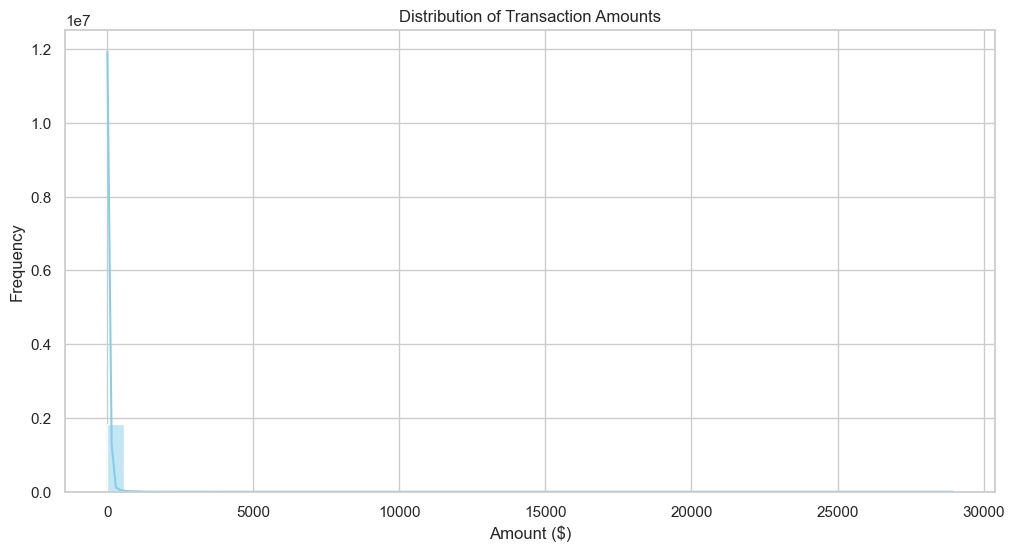

In [82]:
#A histogram of the transaction amount and provide the conclusions and insights gathered
sns.histplot(merged_df['amt'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.show()

C:\Users\romdh\AppData\Local\Temp\ipykernel_5992\1402468265.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_df[fraud_df['category'].isin(top_fraud_categories.index)],


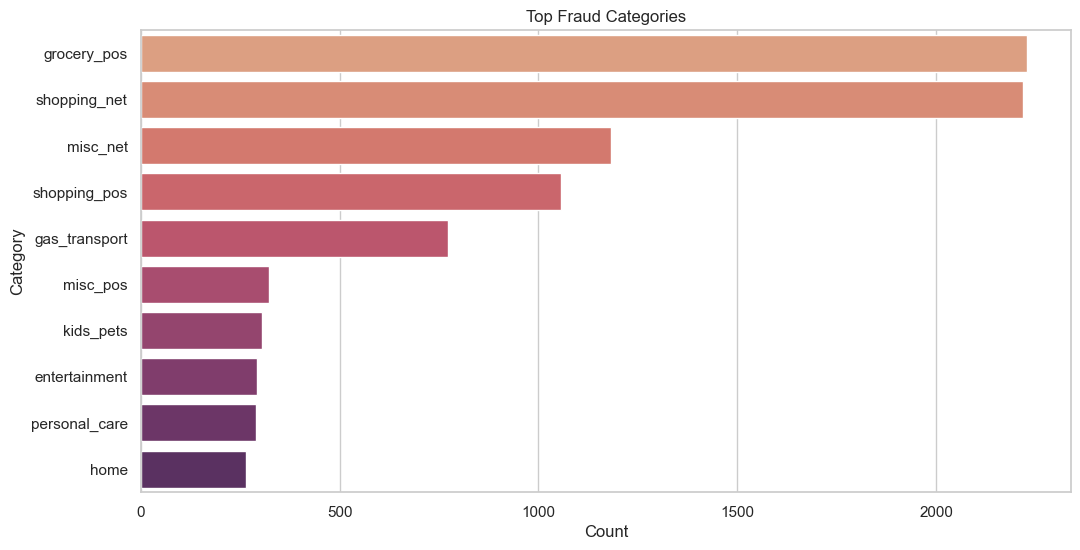

In [83]:
#Top Categories of the Fraudulent Transactions and provide the conclusions and insights gathered
fraud_df = merged_df[merged_df['is_fraud'] == 1]
top_fraud_categories = fraud_df['category'].value_counts().nlargest(10)

sns.countplot(data=fraud_df[fraud_df['category'].isin(top_fraud_categories.index)],
              y='category', order=top_fraud_categories.index, palette='flare')
plt.title("Top Fraud Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

C:\Users\romdh\AppData\Local\Temp\ipykernel_5992\1169789616.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_state.values, y=fraud_by_state.index, palette='magma')


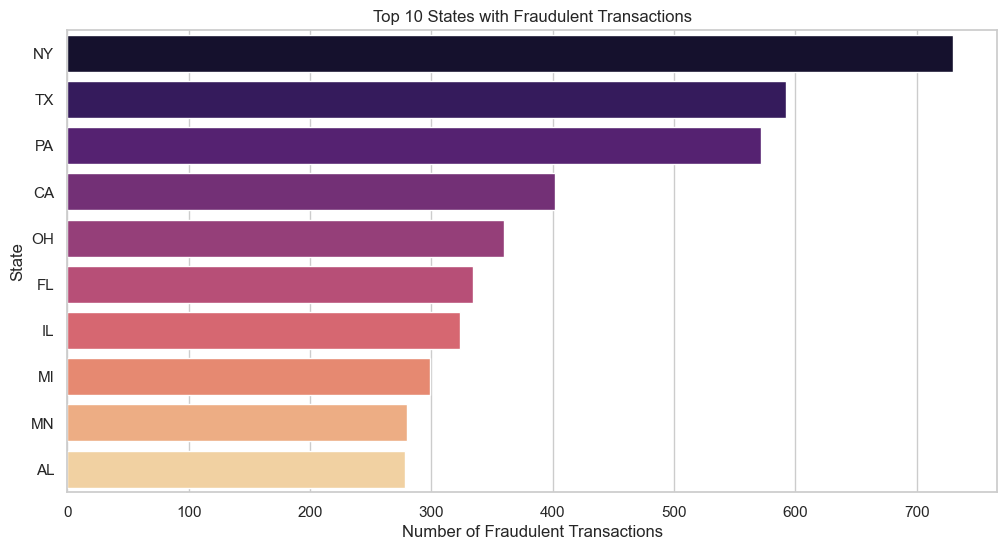

In [84]:
#State-wise Analysis of Fraudulent Transactions and provide the conclusions and insights gathered
fraud_by_state = fraud_df['state'].value_counts().nlargest(10)

sns.barplot(x=fraud_by_state.values, y=fraud_by_state.index, palette='magma')
plt.title("Top 10 States with Fraudulent Transactions")
plt.xlabel("Number of Fraudulent Transactions")
plt.ylabel("State")
plt.show()


C:\Users\romdh\AppData\Local\Temp\ipykernel_5992\2961241669.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_city.values, y=fraud_by_city.index, palette='rocket')


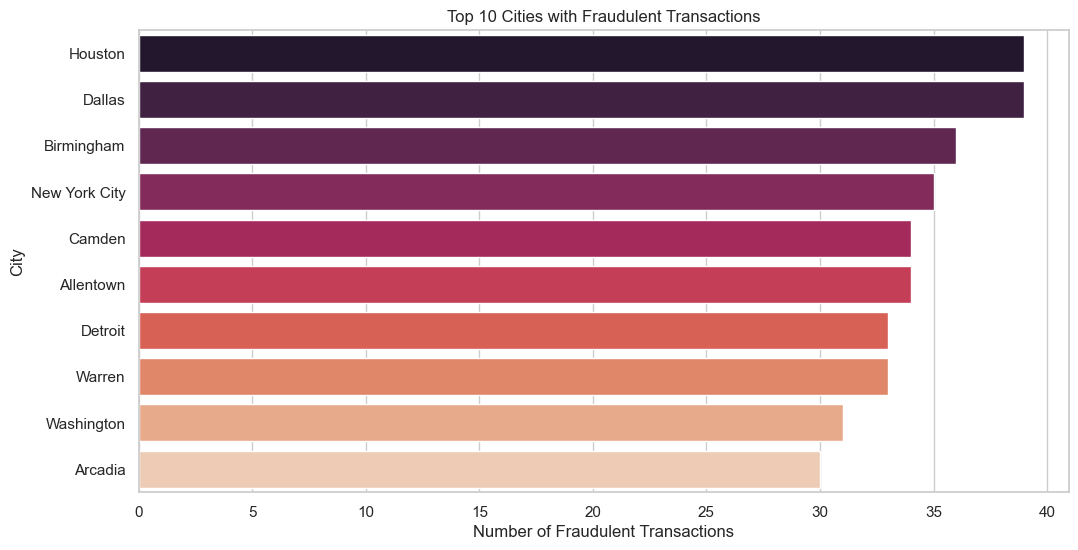

In [85]:
#City-wise Analysis of Fraudulent Transactions and provide the conclusions and insights gathered
fraud_by_city = fraud_df['city'].value_counts().nlargest(10)

sns.barplot(x=fraud_by_city.values, y=fraud_by_city.index, palette='rocket')
plt.title("Top 10 Cities with Fraudulent Transactions")
plt.xlabel("Number of Fraudulent Transactions")
plt.ylabel("City")
plt.show()


C:\Users\romdh\AppData\Local\Temp\ipykernel_5992\1173081517.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_job.values, y=fraud_by_job.index, palette='cool')


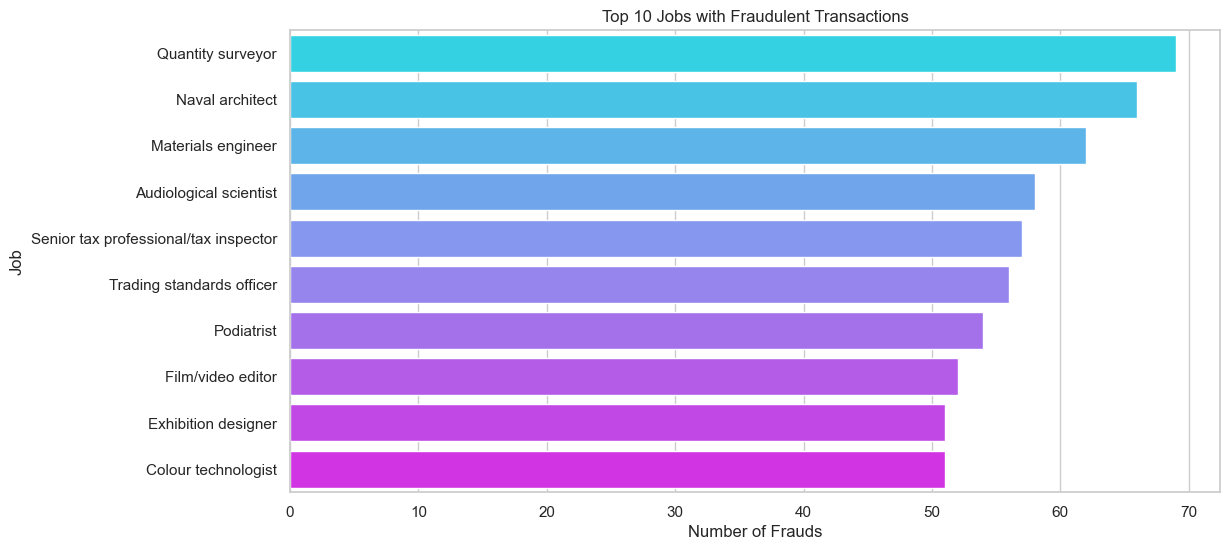

In [86]:
#Number of Credit Card Frauds by Job and provide the conclusions and insights gathered
fraud_by_job = fraud_df['job'].value_counts().nlargest(10)

sns.barplot(x=fraud_by_job.values, y=fraud_by_job.index, palette='cool')
plt.title("Top 10 Jobs with Fraudulent Transactions")
plt.xlabel("Number of Frauds")
plt.ylabel("Job")
plt.show()

C:\Users\romdh\AppData\Local\Temp\ipykernel_5992\1448392865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['age'] = (pd.to_datetime('2020-01-01') - fraud_df['dob']).dt.days // 365
C:\Users\romdh\AppData\Local\Temp\ipykernel_5992\1448392865.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['age_group'] = pd.cut(fraud_df['age'], bins=[18, 25, 35, 45, 55, 65, 100],
C:\Users\romdh\AppData\Local\Temp\ipykernel_5992\1448392865.py:9: FutureWarning: 

Passing `palette` without assigning `hu

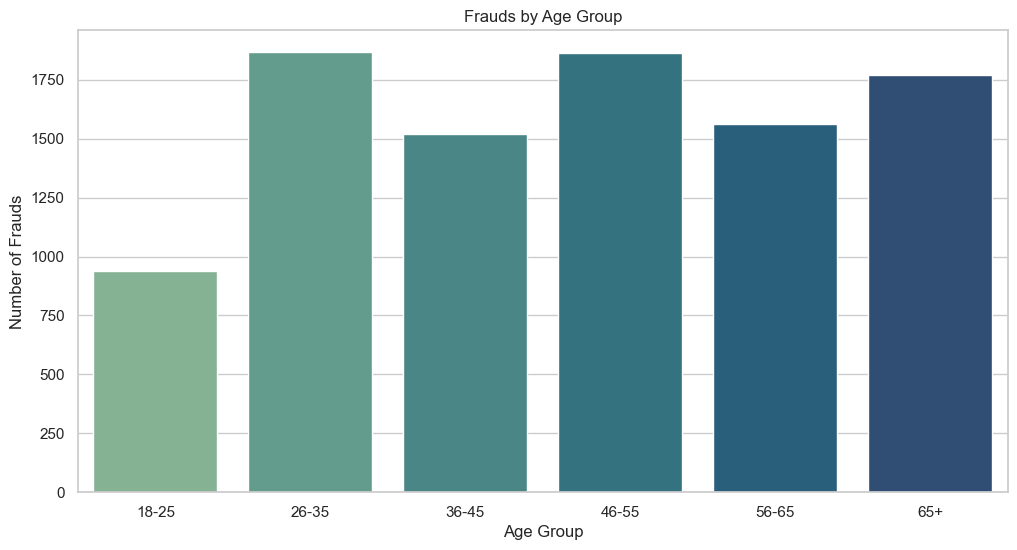

In [87]:
#Number of Credit Card Frauds by Age Groups and provide the conclusions and insights gathered
# Hitung usia
fraud_df['age'] = (pd.to_datetime('2020-01-01') - fraud_df['dob']).dt.days // 365

# Buat kelompok usia
fraud_df['age_group'] = pd.cut(fraud_df['age'], bins=[18, 25, 35, 45, 55, 65, 100],
                               labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

sns.countplot(data=fraud_df, x='age_group', palette='crest')
plt.title("Frauds by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Frauds")
plt.show()

C:\Users\romdh\AppData\Local\Temp\ipykernel_5992\3307500141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_df, x='gender', palette='Set3')


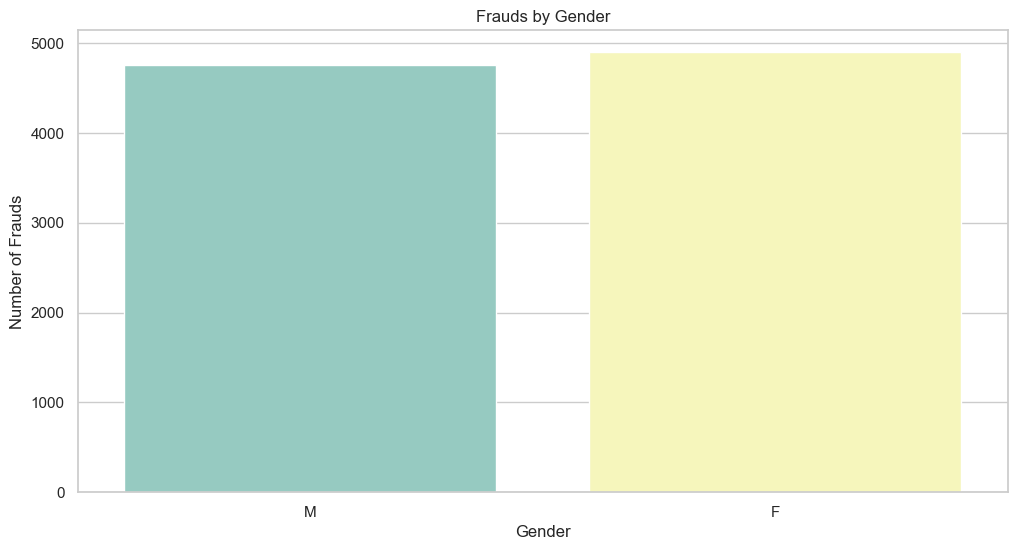

In [88]:
#Number of Credit Card Frauds by Gender and provide the conclusions and insights gathered
sns.countplot(data=fraud_df, x='gender', palette='Set3')
plt.title("Frauds by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Frauds")
plt.show()


C:\Users\romdh\AppData\Local\Temp\ipykernel_5992\1918859655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['year'] = pd.to_datetime(fraud_df['trans_date_trans_time']).dt.year
C:\Users\romdh\AppData\Local\Temp\ipykernel_5992\1918859655.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_df, x='year', palette='YlGnBu')


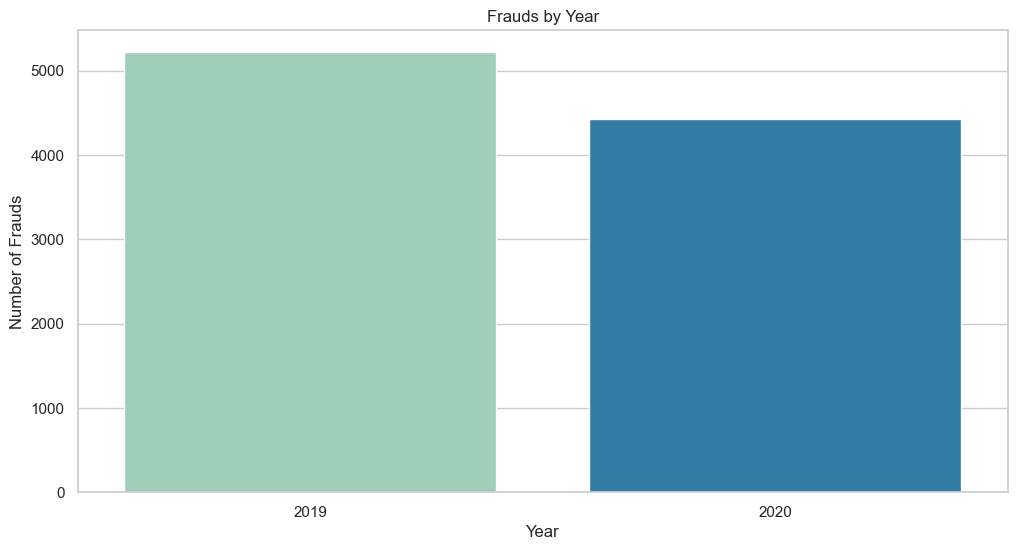

In [89]:
#Number of Credit Card Frauds by Year and provide the conclusions and insights gathered
fraud_df['year'] = pd.to_datetime(fraud_df['trans_date_trans_time']).dt.year

sns.countplot(data=fraud_df, x='year', palette='YlGnBu')
plt.title("Frauds by Year")
plt.xlabel("Year")
plt.ylabel("Number of Frauds")
plt.show()

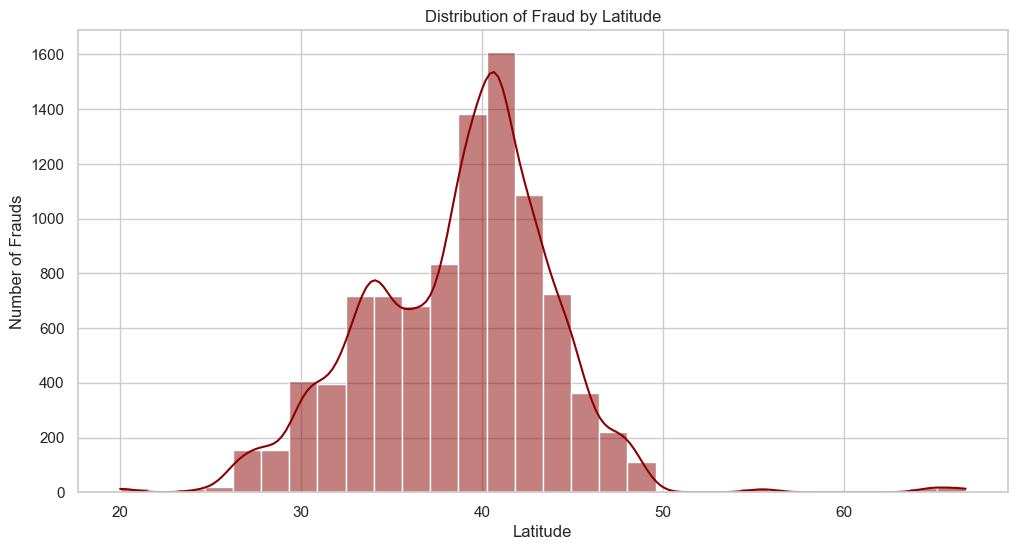

In [90]:
#Number of Credit Card Frauds by latitudinal distance and provide the conclusions and insights gathered
sns.histplot(fraud_df['lat'], bins=30, kde=True, color='darkred')
plt.title("Distribution of Fraud by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Number of Frauds")
plt.show()

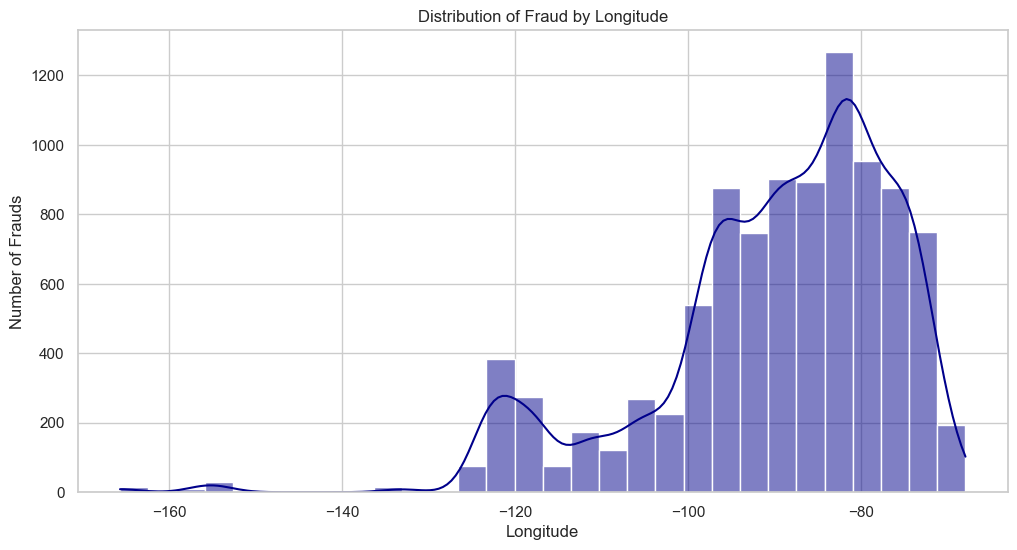

In [91]:
#Number of Credit Card Frauds by longitudinal distance and provide the conclusions and insights gathered
sns.histplot(fraud_df['long'], bins=30, kde=True, color='darkblue')
plt.title("Distribution of Fraud by Longitude")
plt.xlabel("Longitude")
plt.ylabel("Number of Frauds")
plt.show()

## Activity 6: Feature Engineering

In [92]:
#Encode categorical variables using techniques suitable for the model, such as one-hot encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Salin dataframe untuk diproses
df = merged_df.copy()

# One-hot encode untuk 'category' dan 'gender'
df = pd.get_dummies(df, columns=['category', 'gender'], drop_first=True)


In [93]:
#Drop highly correlated or redundant features to reduce dimensionality
redundant_cols = ['trans_date_trans_time', 'trans_date', 'dob', 'unix_time',
                  'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'trans_num']
df.drop(columns=redundant_cols, inplace=True, errors='ignore')

In [94]:
#Label encode categorical features
if df['job'].dtype == 'object':
    le = LabelEncoder()
    df['job'] = le.fit_transform(df['job'])

In [95]:
#Normalize or standardize numerical features to improve model performance
from sklearn.preprocessing import StandardScaler

# Tambahkan kolom 'age' berdasarkan kolom dob
df['age'] = (pd.to_datetime("2020-01-01") - pd.to_datetime(merged_df['dob'])).dt.days // 365

# Normalisasi fitur numerik
scaler = StandardScaler()
numerical_cols = ['amt', 'lat', 'long', 'zip', 'age']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [96]:
#Save the final dataset as 'Capstone_Dataset.csv'
df.to_csv("Capstone_Dataset.csv", index=False)

## Activity 7: Model Training and Evaluation

In [97]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Fitur & label
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Stratified split agar distribusi fraud seimbang
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Oversampling
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

In [98]:
#Train a logistic regression, Decision Tree, Random Forest, Adaboost, GaussianNB, KNN classifier, and LightGBM Classifier, model to predict fraudulent transactions
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

# Model dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "AdaBoost": AdaBoostClassifier(),
    "GaussianNB": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier()
}

# Latih semua model
trained_models = {}
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    trained_models[name] = model

[LightGBM] [Info] Number of positive: 1474194, number of negative: 1474194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.223702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2719
[LightGBM] [Info] Number of data points in the train set: 2948388, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [99]:
#Evaluate the model using metrics such as accuracy, precision, recall, and the F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\n Model Evaluation Metrics:\n")

for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f" {name}")
    print(f"   - Accuracy : {acc:.4f}")
    print(f"   - Precision: {prec:.4f}")
    print(f"   - Recall   : {rec:.4f}")
    print(f"   - F1-score : {f1:.4f}\n")


 Model Evaluation Metrics:

 Logistic Regression
   - Accuracy : 0.8860
   - Precision: 0.0339
   - Recall   : 0.7596
   - F1-score : 0.0649

 Decision Tree
   - Accuracy : 0.9952
   - Precision: 0.5284
   - Recall   : 0.7523
   - F1-score : 0.6208

 Random Forest
   - Accuracy : 0.9968
   - Precision: 0.6774
   - Recall   : 0.7528
   - F1-score : 0.7131

 AdaBoost
   - Accuracy : 0.8966
   - Precision: 0.0438
   - Recall   : 0.9062
   - F1-score : 0.0836

 GaussianNB
   - Accuracy : 0.6183
   - Precision: 0.0101
   - Recall   : 0.7425
   - F1-score : 0.0199

 KNN
   - Accuracy : 0.9937
   - Precision: 0.4429
   - Recall   : 0.7782
   - F1-score : 0.5646



c:\Users\romdh\Documents\python\BDSE_CAI_Project_Source_Code\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


 LightGBM
   - Accuracy : 0.9785
   - Precision: 0.1894
   - Recall   : 0.9539
   - F1-score : 0.3160



In [100]:
#Utilize confusion matrix and classification reports to assess performance
from sklearn.metrics import confusion_matrix, classification_report

print("\n Confusion Matrices & Classification Reports:\n")

for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4, zero_division=0)

    print(f" {name}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", report)
    print("-" * 60)



 Confusion Matrices & Classification Reports:

 Logistic Regression
Confusion Matrix:
 [[326780  41769]
 [   464   1466]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9986    0.8867    0.9393    368549
           1     0.0339    0.7596    0.0649      1930

    accuracy                         0.8860    370479
   macro avg     0.5162    0.8231    0.5021    370479
weighted avg     0.9936    0.8860    0.9347    370479

------------------------------------------------------------
 Decision Tree
Confusion Matrix:
 [[367253   1296]
 [   478   1452]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9987    0.9965    0.9976    368549
           1     0.5284    0.7523    0.6208      1930

    accuracy                         0.9952    370479
   macro avg     0.7635    0.8744    0.8092    370479
weighted avg     0.9963    0.9952    0.9956    370479

---------------------------------------------

c:\Users\romdh\Documents\python\BDSE_CAI_Project_Source_Code\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


 LightGBM
Confusion Matrix:
 [[360668   7881]
 [    89   1841]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9786    0.9891    368549
           1     0.1894    0.9539    0.3160      1930

    accuracy                         0.9785    370479
   macro avg     0.5946    0.9663    0.6525    370479
weighted avg     0.9955    0.9785    0.9856    370479

------------------------------------------------------------
